In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import build_model

model = build_model("config/model.yaml",verbose=True)
model

{'loss': {'modules': [{'inp_src': ['args:0',
                                   'args:1',
                                   'args:2',
                                   'args:3',
                                   'args:4',
                                   'args:5',
                                   'args:6',
                                   'args:7',
                                   'args:8',
                                   'args:9',
                                   'args:10'],
                       'name': 'entry'},
                      {'cls': 'nll_loss',
                       'config': {'reduction': 'mean', 'weight': [0.1, 1.0]},
                       'inp_src': ['args:0', 'args:1'],
                       'name': 'background_loss'},
                      {'cls': 'nll_loss',
                       'config': {'reduction': 'custom',
                                  'weight': [1.0,
                                             1.0,
                                    

ComposableModel(
  (point_net_encoder): PointNetEncoder(
    (local_nn): Mlp(
      (mlp): Sequential(
        (0): Linear(in_features=4, out_features=4, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Linear(in_features=4, out_features=16, bias=True)
        (4): ReLU()
        (5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (global_nn): Mlp(
      (mlp): Sequential(
        (0): Linear(in_features=16, out_features=16, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): Linear(in_features=16, out_features=64, bias=True)
        (4): ReLU()
        (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (6): Linear(in_features=64, out_features=128, bias=True)
        (7): ReLU()
        (8): BatchNorm1d(128, eps=1e-05, moment

In [3]:
import torch
chkpt = torch.load("runs/2025-02-13_11-57-44/chkpt/best_model.pt",
                   weights_only=False)
print(chkpt["model"].keys())
corrected_chkpt = {k.replace('_orig_mod.', ''): v for k, v in chkpt["model"].items()}
print(corrected_chkpt.keys())
model.load_state_dict(corrected_chkpt)

odict_keys(['_orig_mod.point_net_encoder.local_nn.mlp.0.weight', '_orig_mod.point_net_encoder.local_nn.mlp.0.bias', '_orig_mod.point_net_encoder.local_nn.mlp.2.weight', '_orig_mod.point_net_encoder.local_nn.mlp.2.bias', '_orig_mod.point_net_encoder.local_nn.mlp.2.running_mean', '_orig_mod.point_net_encoder.local_nn.mlp.2.running_var', '_orig_mod.point_net_encoder.local_nn.mlp.2.num_batches_tracked', '_orig_mod.point_net_encoder.local_nn.mlp.3.weight', '_orig_mod.point_net_encoder.local_nn.mlp.3.bias', '_orig_mod.point_net_encoder.local_nn.mlp.5.weight', '_orig_mod.point_net_encoder.local_nn.mlp.5.bias', '_orig_mod.point_net_encoder.local_nn.mlp.5.running_mean', '_orig_mod.point_net_encoder.local_nn.mlp.5.running_var', '_orig_mod.point_net_encoder.local_nn.mlp.5.num_batches_tracked', '_orig_mod.point_net_encoder.global_nn.mlp.0.weight', '_orig_mod.point_net_encoder.global_nn.mlp.0.bias', '_orig_mod.point_net_encoder.global_nn.mlp.2.weight', '_orig_mod.point_net_encoder.global_nn.mlp.2.b

<All keys matched successfully>

In [4]:
model._des

{'args:0': ['point_net_encoder:0'],
 'args:1': ['point_net_encoder:1',
  'point_gnn_l1:1',
  'point_gnn_l2:1',
  'point_gnn_l3:1'],
 'args:2': ['point_net_encoder:2',
  'point_gnn_l1:2',
  'point_gnn_l2:2',
  'point_gnn_l3:2'],
 'point_net_encoder:0': ['encoder_batch_norm:0'],
 'encoder_batch_norm:0': ['point_gnn_l1:0'],
 'point_gnn_l1:0': ['point_gnn_l2:0'],
 'point_gnn_l2:0': ['point_gnn_l3:0'],
 'point_gnn_l3:0': ['background_class_head:0',
  'object_class_head:0',
  'box_size_head:0',
  'localization_head:0',
  'orientation_head:0']}

In [5]:
model.point_gnn_l1.mlph.mlp[0].weight

Parameter containing:
tensor([[ 0.0991, -0.0442,  0.0764,  ..., -0.0698,  0.0118,  0.0515],
        [-0.0228, -0.0830, -0.0157,  ...,  0.0052,  0.0120,  0.0013],
        [-0.0386, -0.0660,  0.0541,  ..., -0.0490, -0.0666, -0.0173],
        ...,
        [ 0.0480,  0.0521, -0.0588,  ...,  0.0073, -0.0565,  0.0508],
        [-0.0116, -0.0157, -0.0249,  ..., -0.0273, -0.0311,  0.0674],
        [ 0.0228, -0.0982, -0.0437,  ..., -0.0775, -0.0362,  0.0776]],
       requires_grad=True)

In [21]:
from util import build_dataset
ds_train = build_dataset("config/dataset_wsl.yaml", "train")
ds_train = build_dataset("config/dataset_wsl.yaml", "val")
ds_train = build_dataset("config/dataset_wsl.yaml", "test")


Processing...
100%|██████████| 319/319 [00:38<00:00,  8.21it/s]
Done!
Processing...
100%|██████████| 40/40 [00:03<00:00, 11.82it/s]
Done!
Processing...
100%|██████████| 45/45 [00:05<00:00,  8.10it/s]
Done!


In [22]:
from torch_geometric.nn import radius_graph
data = ds_train[1]
# edge_index = radius_graph(data.x, r=0.2)
# data.edge_index = edge_index
data = data.to("cpu")

In [23]:
data.edge_index.shape

torch.Size([2, 38896])

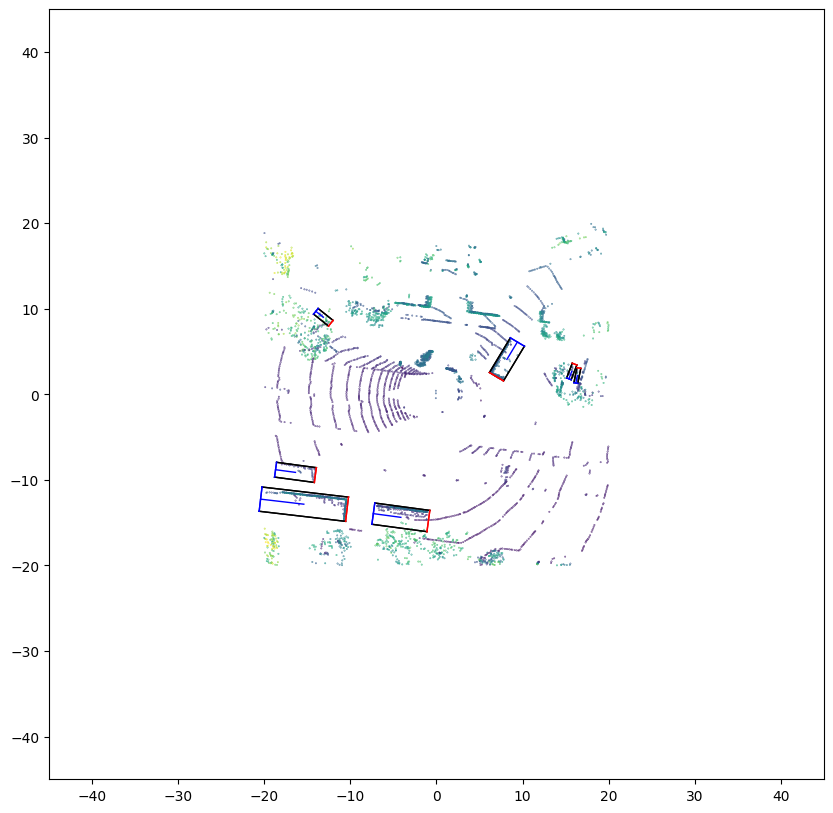

In [24]:
from util import plot_torch_geo_data
plot_torch_geo_data(data)

In [10]:
out = model(data.x, data.pos, data.edge_index)

out_encoder = out["encoder"].detach().numpy()
out_gnn_1 = out["gnn_l1"].detach().numpy()
out_gnn_2 = out["gnn_l2"].detach().numpy()
out_gnn_3 = out["gnn_l3"].detach().numpy()

In [11]:
print(out["background"].shape)
print(out["object"].shape)
print(out["localization"].shape)
print(out["box_size"].shape)
print(out["orientation"].shape)

torch.Size([7344, 2])
torch.Size([7344, 7])
torch.Size([7344, 3])
torch.Size([7344, 3])
torch.Size([7344, 1])


In [12]:
# out_encoder, out_gnn_1, out_gnn_2, out_gnn_3 = model(data.x,data.pos,data.edge_index)

# out_encoder = out_encoder.detach().numpy()
# out_gnn_1 = out_gnn_1.detach().numpy()
# out_gnn_2 = out_gnn_2.detach().numpy()
# out_gnn_3 = out_gnn_3.detach().numpy()

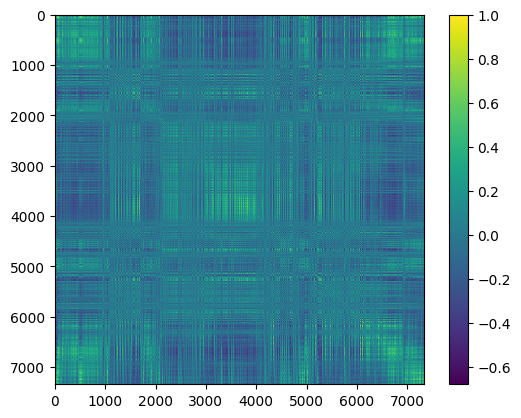

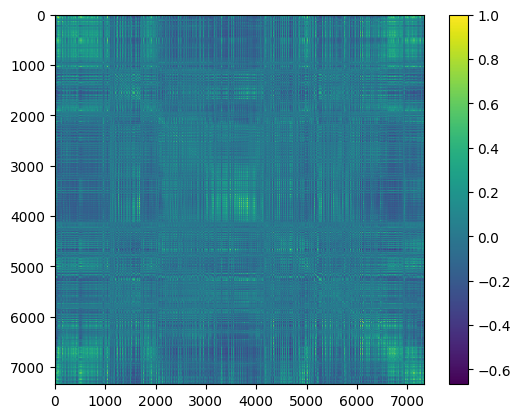

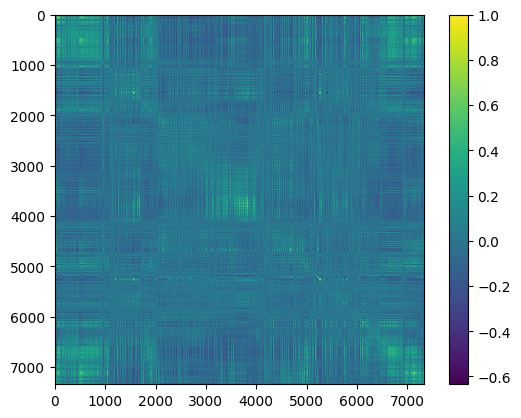

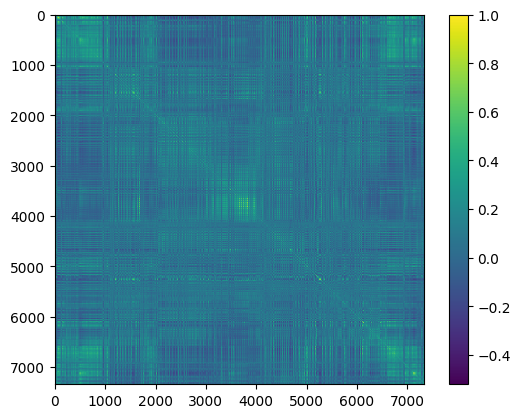

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.corrcoef(out_encoder))
plt.colorbar()
plt.show()

plt.imshow(np.corrcoef(out_gnn_1))
plt.colorbar()
plt.show()

plt.imshow(np.corrcoef(out_gnn_2))
plt.colorbar()
plt.show()

plt.imshow(np.corrcoef(out_gnn_3))
plt.colorbar()
plt.show()

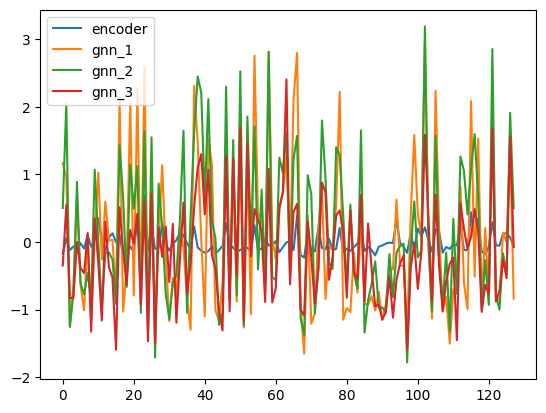

In [19]:
ind = 0
plt.plot(out_encoder[ind])
plt.plot(out_gnn_1[ind])
plt.plot(out_gnn_2[ind])
plt.plot(out_gnn_3[ind])
plt.legend(["encoder", "gnn_1", "gnn_2", "gnn_3"])
plt.show()

In [15]:
model.point_gnn_l1.mlph.mlp[0].weight[:10,:5]

tensor([[ 0.0991, -0.0442,  0.0764, -0.0609,  0.0628],
        [-0.0228, -0.0830, -0.0157,  0.0631,  0.0232],
        [-0.0386, -0.0660,  0.0541, -0.0386,  0.0260],
        [-0.0447,  0.0235, -0.0137, -0.0096, -0.0289],
        [-0.0753, -0.0348,  0.0540, -0.0958, -0.0832],
        [-0.1078,  0.0078,  0.0575,  0.0682,  0.0138],
        [ 0.0785, -0.0277,  0.0103, -0.0413, -0.1102],
        [ 0.0702, -0.0488, -0.0024,  0.0209,  0.0022],
        [-0.0319,  0.0441,  0.0095, -0.0044, -0.0017],
        [-0.0599,  0.0542,  0.0347,  0.0481,  0.0664]],
       grad_fn=<SliceBackward0>)

In [16]:
model.point_gnn_l2.mlph.mlp[0].weight[:10,:5]

tensor([[ 0.0663, -0.1381, -0.1056,  0.0190,  0.0382],
        [-0.0783, -0.0025, -0.0037,  0.0856,  0.0309],
        [ 0.0077,  0.0262,  0.0355,  0.0487,  0.1026],
        [ 0.0023,  0.1298,  0.0128,  0.0303,  0.0284],
        [ 0.0175, -0.1083,  0.0194,  0.0048,  0.0118],
        [-0.0532,  0.0782,  0.0486, -0.0143,  0.0317],
        [ 0.0752, -0.0051,  0.0459, -0.0955,  0.1033],
        [-0.0208,  0.0507,  0.0201,  0.0335, -0.0024],
        [-0.0681,  0.0736, -0.0421, -0.0972, -0.0801],
        [-0.0412, -0.0639, -0.0184,  0.0828,  0.0621]],
       grad_fn=<SliceBackward0>)

In [17]:
out = "xxx:".split(":")
out

['xxx', '']

In [18]:
srcs = ["xxx", "yyy"]

for isrc, src in enumerate(srcs):
    parsed_src = src.split(":")
    if len(parsed_src) == 1: # positional argument ommited, assumed to be 0
        srcs[isrc] = f"{src}:0"

print(srcs)

['xxx:0', 'yyy:0']
